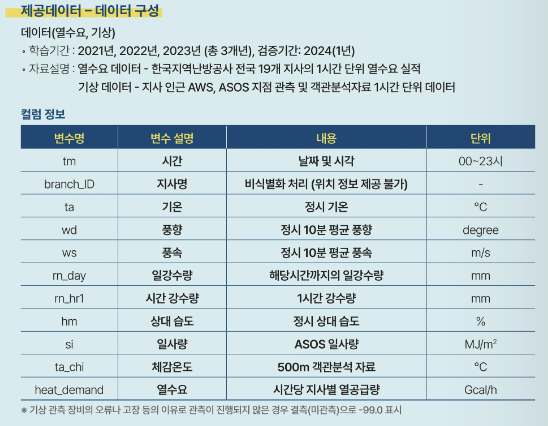

## 패키지 & 데이터 로드

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install missingno
import missingno

In [4]:
heat = pd.read_csv("../train_heat.csv", index_col=0)
heat.head()

,train_heat.tm,train_heat.branch_id,train_heat.ta,train_heat.wd,train_heat.ws,train_heat.rn_day,train_heat.rn_hr1,train_heat.hm,train_heat.si,train_heat.ta_chi,train_heat.heat_demand
1,2021010101,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.0,-8.2,281
2,2021010102,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.0,-8.6,262
3,2021010103,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.0,-8.8,266
4,2021010104,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.0,-8.9,285
5,2021010105,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.0,-9.2,283


In [ ]:
# 컬럼명에서 train_heat. 제거
heat.columns = heat.columns.str.replace("train_heat.", "", regex=False)
heat.head(2)

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
1,2021010101,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.0,-8.2,281
2,2021010102,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.0,-8.6,262


In [6]:
heat.shape
# 499301개의 데이터, 11개의 feature

(499301, 11)

In [7]:
heat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499301 entries, 1 to 499301
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tm           499301 non-null  int64  
 1   branch_id    499301 non-null  object 
 2   ta           499301 non-null  float64
 3   wd           499301 non-null  float64
 4   ws           499301 non-null  float64
 5   rn_day       499301 non-null  float64
 6   rn_hr1       499301 non-null  float64
 7   hm           499301 non-null  float64
 8   si           499301 non-null  float64
 9   ta_chi       499301 non-null  float64
 10  heat_demand  499301 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 45.7+ MB


In [8]:
# 날짜 데이터를 데이트타임으로 변경
heat['tm'] = pd.to_datetime(heat['tm'].astype(str), format="%Y%m%d%H")

In [ ]:
heat['tm'] # 2021-01-01부터 2023-12-31까지의 데이터

1        2021-01-01 01:00:00
2        2021-01-01 02:00:00
3        2021-01-01 03:00:00
4        2021-01-01 04:00:00
5        2021-01-01 05:00:00
                 ...        
499297   2023-12-31 19:00:00
499298   2023-12-31 20:00:00
499299   2023-12-31 21:00:00
499300   2023-12-31 22:00:00
499301   2023-12-31 23:00:00
Name: tm, Length: 499301, dtype: datetime64[ns]

In [ ]:
heat['year'] = heat['tm'].dt.year
heat['month'] = heat['tm'].dt.month
heat['day'] = heat['tm'].dt.day
heat['hour'] = heat['tm'].dt.hour

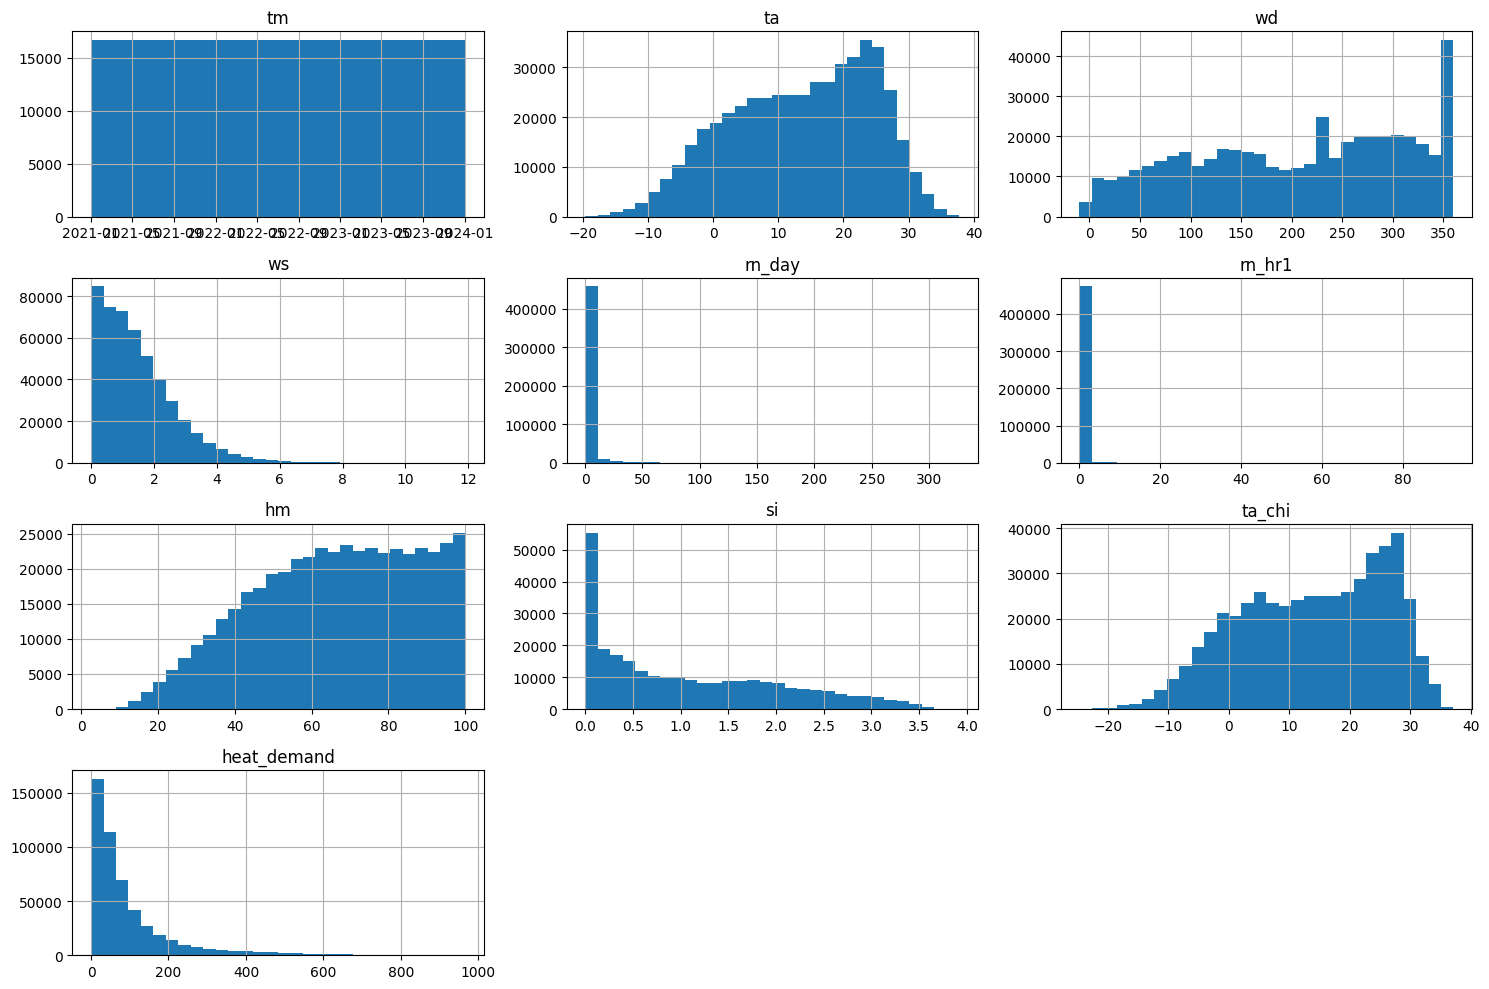

In [18]:
heat.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

## 결측치 확인
- -99로 저장되어 있음

In [ ]:
len(heat[heat.isin([-99]).any(axis=1)])
# 263069개의 결측치 -> na로 대체할래

263069

In [12]:
heat = heat.replace(-99, np.nan)

In [ ]:
heat.isnull().sum()

tm                  0
branch_id           0
ta              12997
wd              18815
ws              18815
rn_day          18626
rn_hr1          19154
hm              39717
si             232922
ta_chi             20
heat_demand        23
dtype: int64

In [ ]:
# 비율로 확인
heat.isnull().mean()

tm             0.000000
branch_id      0.000000
ta             0.026030
wd             0.037683
ws             0.037683
rn_day         0.037304
rn_hr1         0.038362
hm             0.079545
si             0.466496
ta_chi         0.000040
heat_demand    0.000046
dtype: float64

- si에 유난히 결측치 많음!!

<Axes: >

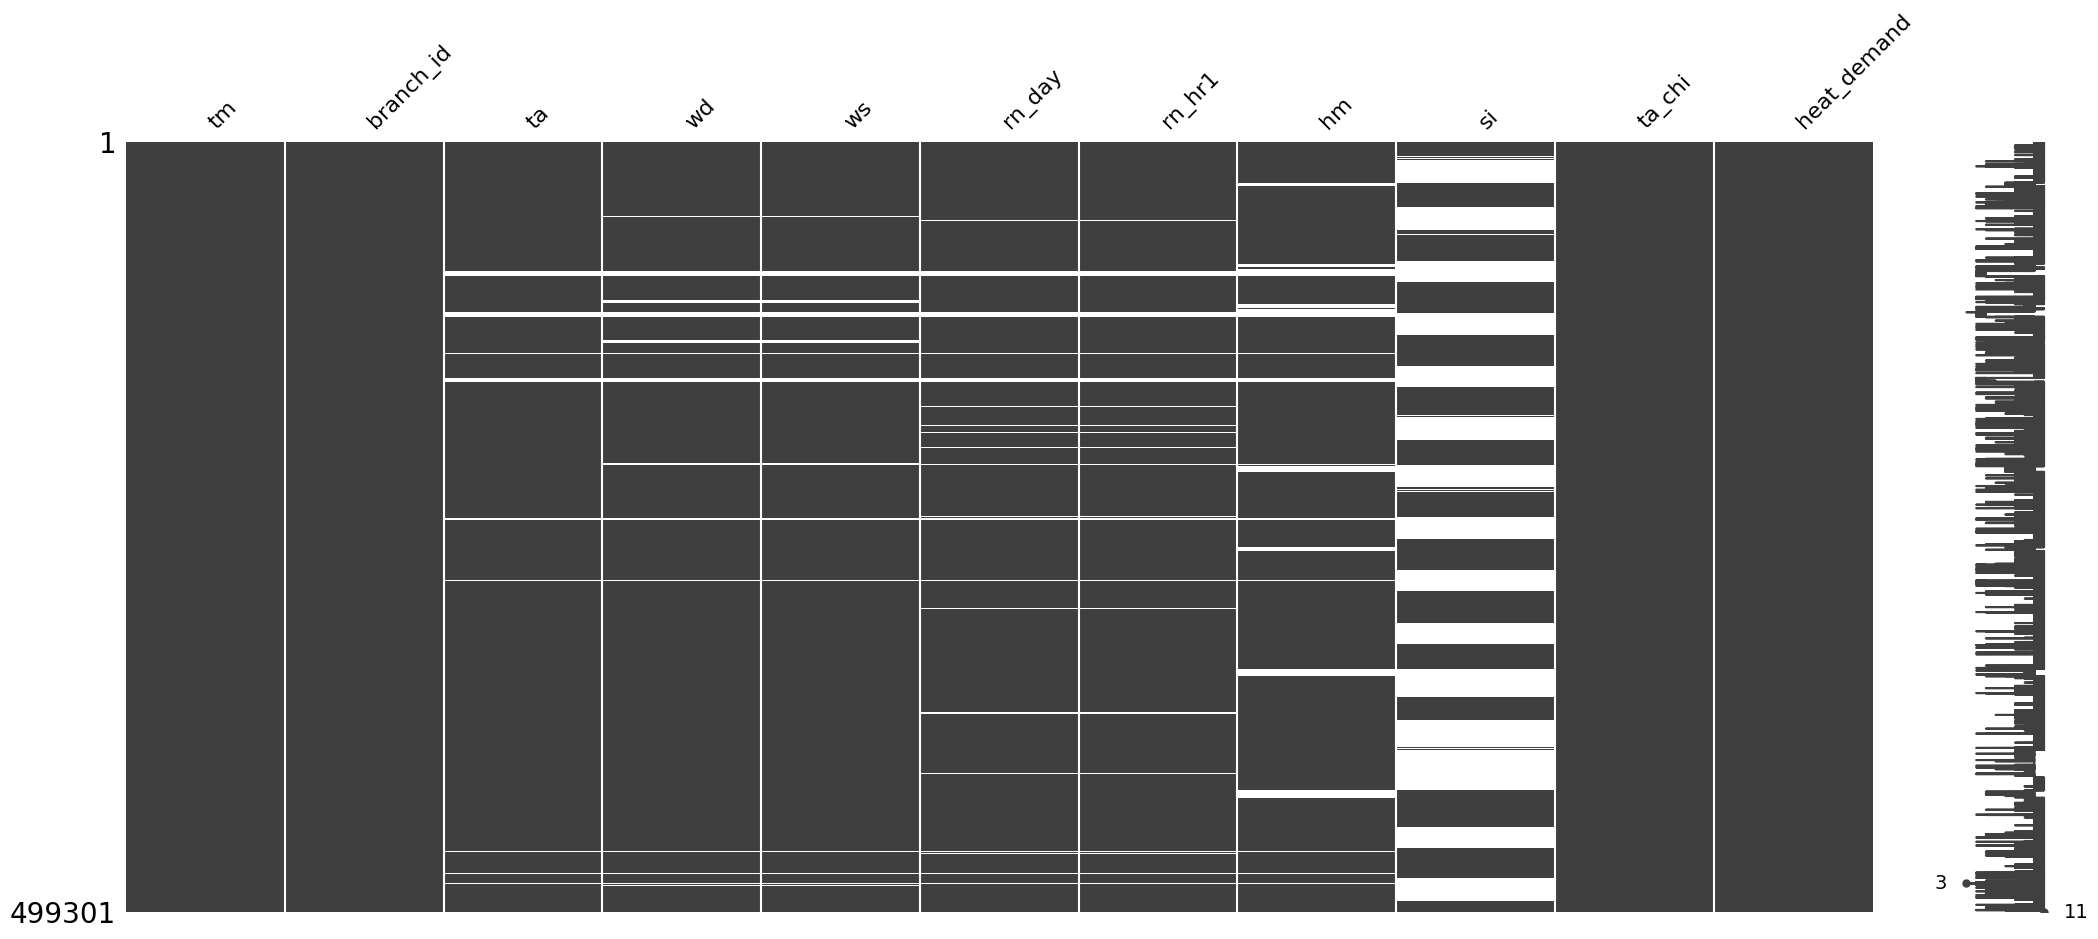

In [ ]:
# 시각화로 확인
missingno.matrix(heat)

# 피처 하나씩 보기

## branch_id

In [10]:
heat['branch_id'].nunique()
# 19개의 지사

19

In [11]:
heat['branch_id'].value_counts()
# 관측값의 개수는 모두 같음.

branch_id
A    26279
B    26279
C    26279
D    26279
E    26279
F    26279
G    26279
H    26279
I    26279
J    26279
K    26279
L    26279
M    26279
N    26279
O    26279
P    26279
Q    26279
R    26279
S    26279
Name: count, dtype: int64